In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot 
import plotly_express as px 

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('D:/Data/Analysis/hotel_bookings/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
data.shape

(119390, 32)

In [4]:
# data preprocessing 
# check for NaN values 
data.isnull().values.any()

True

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.fillna(value=0, inplace=True)
data.isnull().values.any()

False

In [7]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
data.babies.unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [9]:
data.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

In [10]:
data.children.unique()

array([ 0.,  1.,  2., 10.,  3.])

In [11]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [12]:
# adults , babies and childern cant be zero at a time 
filter_df = (data['adults'] == 0) & (data['babies'] == 0) & (data['children'] == 0)
data[filter_df]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [13]:
# remove these 180 rows from or dataframe 
df = data[~filter_df]  #negation
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [14]:
df.shape

(119210, 32)

In [15]:
###### where do the guests come from & perfrom spatial analysis ###########

# which country they come from and which hotel they are stayed in and is their reservation is cancelled or not

df['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
df['country'].value_counts().head()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
Name: country, dtype: int64

In [17]:
df['is_canceled'].unique()  # 0 means no 

array([0, 1], dtype=int64)

In [32]:
resort =df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city = df[(df['hotel'] == 'City Hotel') &(df['is_canceled'] == 0)]
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [19]:
city.shape

(46084, 32)

In [20]:
resort['country'].value_counts().index

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU',  'CN', 'NLD',     0, 'USA',
       ...
       'MAC', 'MDG', 'UGA', 'BHS', 'LKA', 'PER', 'DJI', 'PLW', 'HKG', 'CYM'],
      dtype='object', length=119)

In [59]:
plt.figure(figsize=(20,20))
trace1 = go.Pie(labels=resort['country'].value_counts().index,
               values=resort['country'].value_counts(),
               hoverinfo='label+percent',
               textinfo='value')
iplot([trace1])

<Figure size 1440x1440 with 0 Axes>

In [22]:
# spitial analysis 
country_df = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_df.head()

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [23]:
country_df.columns = ['country','guests']
country_df.head()

,country,guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [24]:
px.choropleth(country_df,
             locations=country_df['country'],
             color=country_df['guests'],
             hover_name=country_df['country'],
             title='where guests come from ')

In [25]:
# Portugal has the most no. of guests  

In [26]:
############### how much do guests pay for a room per night ?################
# for every room type how much it cost adr (Average daily rate)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [27]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

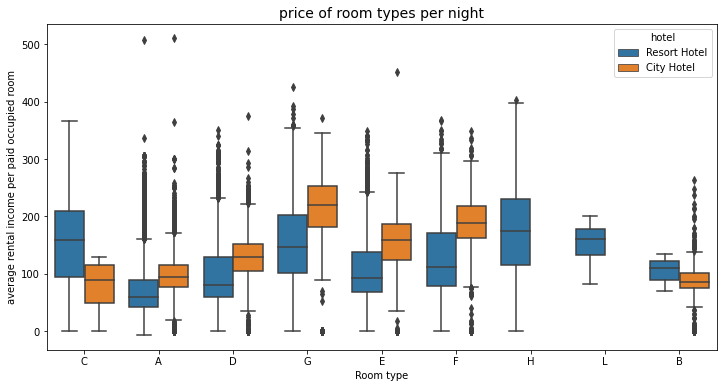

In [28]:
adr_df = df[df['is_canceled'] == 0]  # not cancelled 
plt.figure(figsize=(12,6))
sns.boxplot(x='reserved_room_type',y= 'adr',hue='hotel', data=adr_df)
plt.title('price of room types per night', fontsize = 14)
plt.xlabel('Room type')
plt.ylabel('average rental income per paid occupied room')
plt.show()

In [33]:
######how does the price per night vary over the year?################
#for each hotel groupy by month WRT adr 


resort =df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city = df[(df['hotel'] == 'City Hotel') &(df['is_canceled'] == 0)]

In [42]:
resort_hotel= resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel= city.groupby('arrival_date_month')['adr'].mean().reset_index()

# merge 
data = resort_hotel.merge(city_hotel, on='arrival_date_month')
data.columns = ['month','resort_price','city_price']
data.head()
# sort its on monthly basis 
# data = data.sort_values(by=['month']) not working 
data.head()


,month,resort_price,city_price
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983


In [46]:
! pip install sort-dataframeby-monthorweek
! pip install sorted-months-weekdays


You should consider upgrading via the 'c:\users\s10y01r\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3240 sha256=0aac717e4c3ff72af5c206bd6bd15953ce7c978d7f68cf09748a1f28bfe9e27d
  Stored in directory: c:\users\s10y01r\appdata\local\pip\cache\wheels\9a\0d\2e\309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


You should consider upgrading via the 'c:\users\s10y01r\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [50]:
import sort_dataframeby_monthorweek as sd
data = sd.Sort_Dataframeby_Month(df=data,monthcolumnname='month')
data.head()

,month,resort_price,city_price
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827


In [52]:
px.line(data, x= 'month', y=['resort_price', 'city_price'],
       title= 'Room price per night over  a year')

In [53]:
# resort has highly increasing over summer and city has not highly as resort over spring and autmn seasons 

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

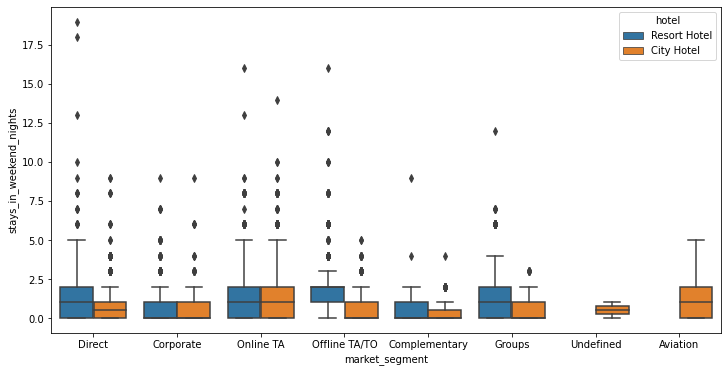

In [56]:
####### Distrbution of nights at hotels by market segement and hotel type 
# hotel segements over nights WRT each hotel 

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='market_segment',y='stays_in_weekend_nights',
           hue='hotel')

In [60]:
# guests prefer staying at resort hotel over city hotel 
# and they dont stay more than a week

In [61]:
#############Preference of guests , what they basically prefer ?#############
# which meal do guests prefer to take 

df['meal'].value_counts()

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [64]:
px.pie(df, names=df['meal'].value_counts().index,
      values=df['meal'].value_counts(),
      hole=0.5)

In [65]:
# about 78% of guests prefre breakfast

c:\users\s10y01r\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

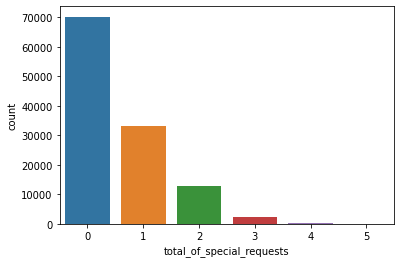

In [66]:
############special requests done by guests####################
sns.countplot(df['total_of_special_requests'])

In [67]:
##################create a pivot table of relationship b/w special requests and cancelation###################
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [72]:
pivot=df.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

<AxesSubplot:xlabel='total_of_special_requests'>

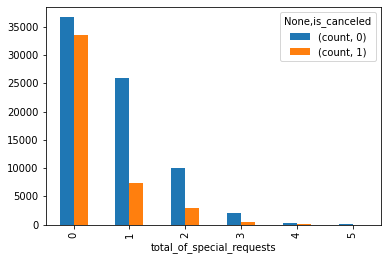

In [75]:
pivot.plot(kind='bar')

In [76]:
# nearly half bookings without any special requests have been cancelled and another half of them have not been canceled

In [77]:
##############which are the most busy months with guests ?###############

resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [80]:
resort_guests = resort['arrival_date_month'].value_counts().reset_index()
resort_guests.head()

,index,arrival_date_month
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550


In [83]:
city_guests = city['arrival_date_month'].value_counts().reset_index()
city_guests.head()

,index,arrival_date_month
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326


In [84]:
guests = resort_guests.merge(city_geuests, on='index')
guests.head()

,index,arrival_date_month_x,arrival_date_month_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010


In [85]:
guests.columns = ['month','resort_guests','city_guests']
guests = sd.Sort_Dataframeby_Month(df=guests, monthcolumnname='month')
guests.head()

,month,resort_guests,city_guests
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568


In [87]:
px.line(guests,x='month',y=['resort_guests','city_guests'],
       title= 'No. of Guests')

In [88]:
# city hotel has more guests during spring and autmn (may to sep)
# resort hotel prices goes down but its higher from june to sepThe City hotel has more guests during spring and autumn, when the prices are also highest.
#in July and August there are less visitors, although prices are lower.
 
#guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
#both hotels have the fewest guests during the winter.

